# CNN 포켓몬 유사 이미지 구현 실습

In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
from PIL import Image
import pandas as pd

In [2]:
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weights
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from the fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [3]:
# CSV 파일 읽기
df = pd.read_csv("C:/Users/db400tea/Downloads/pokemon/pokemon.csv")

# Name 열의 값들을 리스트로 추출
name_list = df['Name'].tolist()

In [4]:
name_list

['bulbasaur',
 'ivysaur',
 'venusaur',
 'charmander',
 'charmeleon',
 'charizard',
 'squirtle',
 'wartortle',
 'blastoise',
 'caterpie',
 'metapod',
 'butterfree',
 'weedle',
 'kakuna',
 'beedrill',
 'pidgey',
 'pidgeotto',
 'pidgeot',
 'rattata',
 'raticate',
 'spearow',
 'fearow',
 'ekans',
 'arbok',
 'pikachu',
 'raichu',
 'sandshrew',
 'sandslash',
 'nidoran-f',
 'nidorina',
 'nidoqueen',
 'nidoran-m',
 'nidorino',
 'nidoking',
 'clefairy',
 'clefable',
 'vulpix',
 'ninetales',
 'jigglypuff',
 'wigglytuff',
 'zubat',
 'golbat',
 'oddish',
 'gloom',
 'vileplume',
 'paras',
 'parasect',
 'venonat',
 'venomoth',
 'diglett',
 'dugtrio',
 'meowth',
 'persian',
 'psyduck',
 'golduck',
 'mankey',
 'primeape',
 'growlithe',
 'arcanine',
 'poliwag',
 'poliwhirl',
 'poliwrath',
 'abra',
 'kadabra',
 'alakazam',
 'machop',
 'machoke',
 'machamp',
 'bellsprout',
 'weepinbell',
 'victreebel',
 'tentacool',
 'tentacruel',
 'geodude',
 'graveler',
 'golem',
 'ponyta',
 'rapidash',
 'slowpoke',
 '

In [5]:
import os
import numpy as np

features = []
img_paths = []

fe = FeatureExtractor()

# Save Image Feature Vector with Database Images
for i in range(1, 1000):
    try:
        # Assuming name_list contains names corresponding to each image
        jpg_path = 'C:/Users/db400tea/Downloads/pokemon/images/images/' + name_list[i] + ".jpg"  # 수정된 부분
        png_path = 'C:/Users/db400tea/Downloads/pokemon/images/images/' + name_list[i] + ".png"  # 수정된 부분
        
        if os.path.exists(jpg_path):
            image_path = jpg_path
        elif os.path.exists(png_path):
            image_path = png_path
        
        img_paths.append(image_path)

        # Extract Features
        img = Image.open(image_path)
        feature = fe.extract(img)
        features.append(feature)

        # Save the Numpy array (.npy) on designated path
        feature_path = "C:/Users/db400tea/Downloads/pokemon/features/" + str(i) + ".npy"
        np.save(feature_path, feature)
    
    except Exception as e:
        print('예외가 발생했습니다.', e)





1/1 [==============================] - 0s 119ms/step


c:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다. list index out of range
예외가 발생했습니다.

1/1 [==============================] - 0s 106ms/step


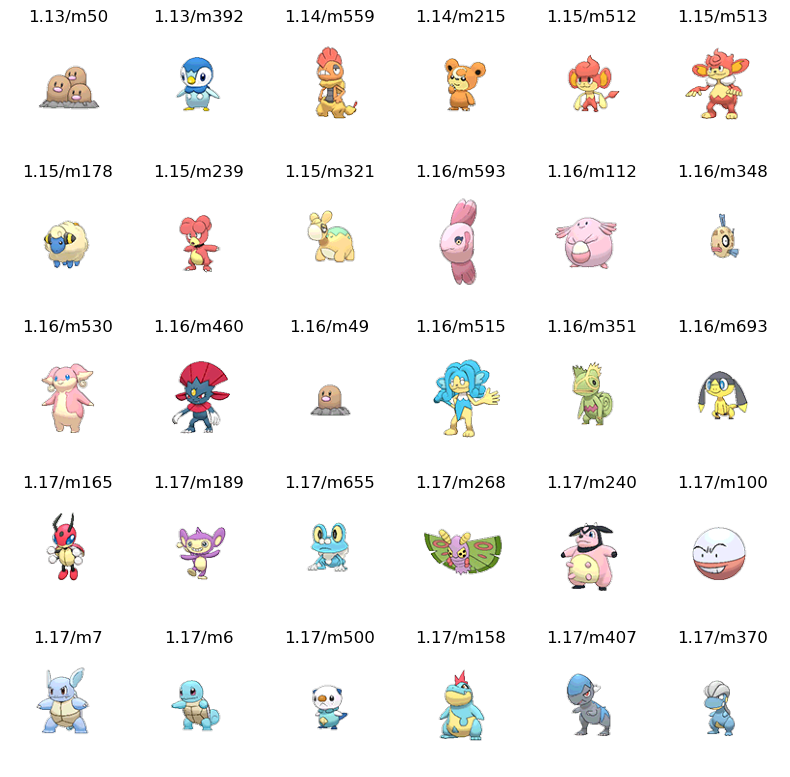

In [8]:
# 유사 이미지 탐색
# 타겟 이미지 불러와서 feature extraction - 미리 저장해둔 feature vector들과 비교
# L2 norm 사용해서 이미지 차이로 비교 계산
import matplotlib.pyplot as plt
# Insert the image query
img = Image.open("C:/Users/db400tea/Downloads/pokemon/pangdori.jpeg")
# Extract its features
query = fe.extract(img)
# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)
# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

1/1 [==============================] - 0s 105ms/step


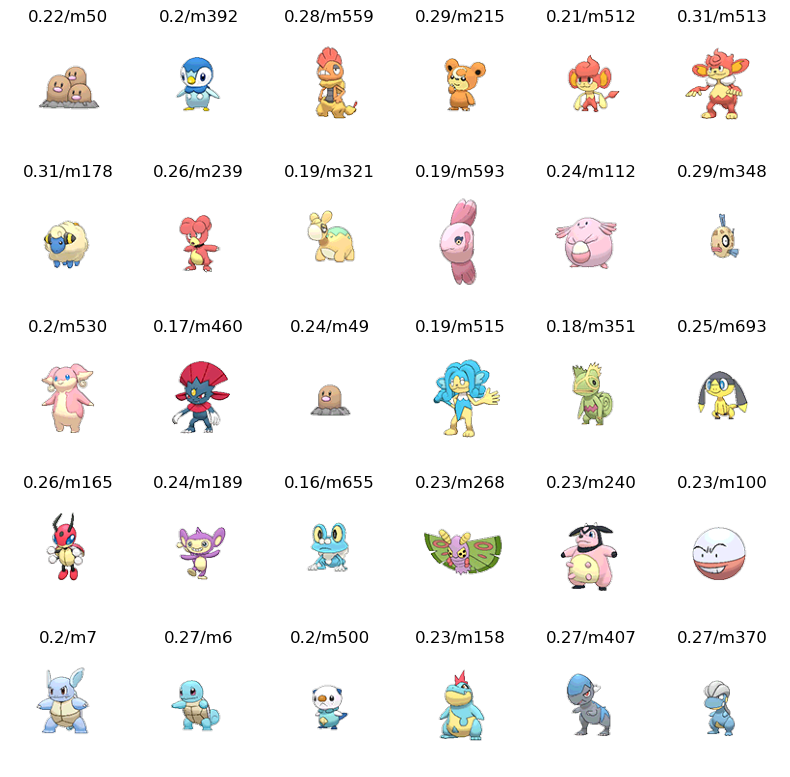

In [10]:
# 코사인 유사도로 비교하기
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
# Insert the image query
img = Image.open("C:/Users/db400tea/Downloads/pokemon/pangdori.jpeg")
# Extract its features
query = fe.extract(img)
similarity = cosine_similarity(query.reshape(1, -1), features)
# Extract 30 images that have highest similarity
ids = np.argsort(-similarity)[0][:30]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(similarity[0][a],2)) + "/m" + str(ids[a]+1)
    axes[-1].set_title(subplot_title)
    plt.axis('off')
    plt.imshow(Image.open(img_paths[ids[a]]))
fig.tight_layout()
plt.show()

1/1 [==============================] - 0s 102ms/step


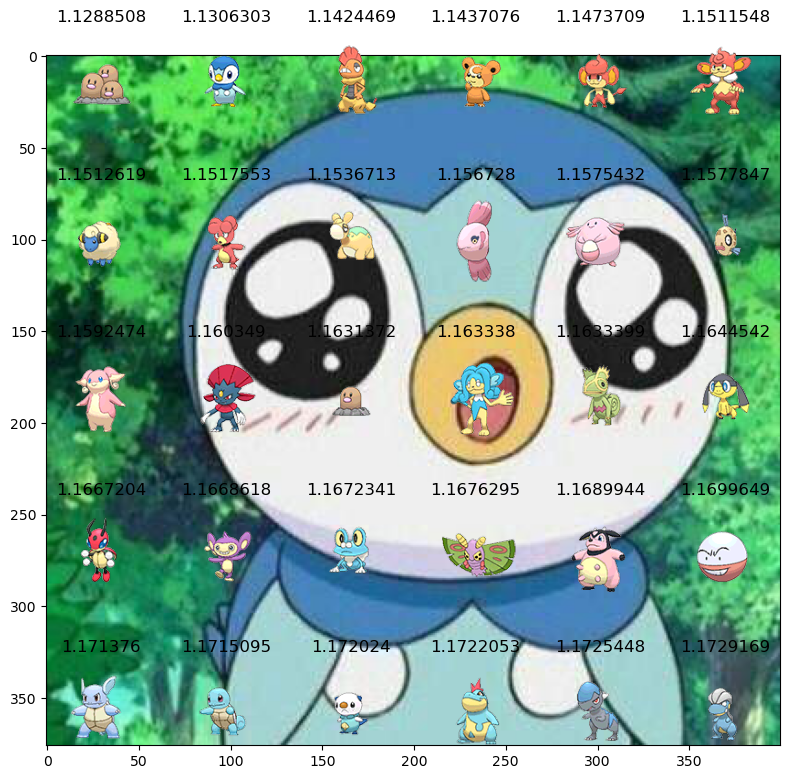

In [12]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
img = Image.open("C:/Users/db400tea/Downloads/pokemon/pangdori.jpeg")
query = fe.extract(img)
dists = np.linalg.norm(features - query, axis=1)
# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
plt.imshow(img)
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()